In [1]:
import MatterSim
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [53]:
episode_id = "17DRP5sb8fy"
image_id = "00ebbf3782c64d74aaf7dd39cd561175"
image_id = "abe20dd6e5194f579dfc6b63a612c150"
WIDTH = 800
HEIGHT = 600
VFOV = math.radians(60)
HFOV = math.radians(90)
VFOV = HFOV / WIDTH * HEIGHT
sim = MatterSim.Simulator()
sim.setCameraResolution(WIDTH, HEIGHT)
sim.setCameraVFOV(VFOV)
sim.setDepthEnabled(True)
sim.initialize()
sim.newEpisode([episode_id], [image_id], [2 * np.pi], [0])
heading = math.radians(60)
elevation = 0.0
location = 0
ANGLEDELTA = 5 * math.pi / 180
sim.makeAction([location], [heading], [elevation])

(600, 800, 3)
rgb (600, 800, 3) uint8
-1.735450029373169 3.595410108566284 1.5342700481414795
1.0471975511965976
0.0


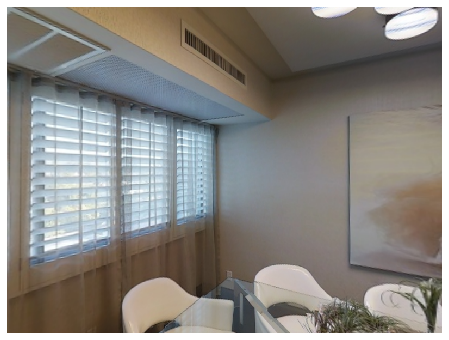

True

In [54]:
state = sim.getState()[0]
locations = state.navigableLocations
bgr = np.array(state.rgb, copy=False)
print(bgr.shape)
rgb = bgr[:, :, [2, 1, 0]]
# rgb=bgr
print("rgb", rgb.shape, rgb.dtype)
print(state.location.x, state.location.y, state.location.z)
print(state.heading)
print(state.elevation)
plt.figure(figsize=(8 ,6))
plt.imshow(rgb)
plt.axis("off")
plt.show()
cv2.imwrite("MatterSim_0_60.png", bgr)